<a href="https://colab.research.google.com/github/Brokencarer/Metal-corrosion-estimation/blob/main/metal_corrosion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from __future__ import division
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import xgboost as xgb
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#00BEBE','#004B64', '#00263C', '#58585a',  '#DCDCDE',
'#FFF794',  '#FF231E'])

#plt.rcParams['axes.facecolor']='#F0F0F2'

In [ ]:
dataset = pd.read_excel('Corrosion_data.xlsx')

In [ ]:
#dataset = dataset.tail(53)
from matplotlib.colors import ListedColormap
cc = ListedColormap(sns.color_palette("Spectral", 8))
#cc = ListedColormap(sns.color_palette("Paired", 8))

In [ ]:
x = dataset.drop(columns = ['Panel Life Estimate'], axis = 1).values
x_min = MinMaxScaler().fit_transform(x)
x_std = StandardScaler().fit_transform(x)
x_nor = Normalizer().fit_transform(x)
x = x
y = dataset['Panel Life Estimate']

In [ ]:
y = y.replace({'>15':'16'}, regex = True)

In [ ]:
y =pd.to_numeric(y).values
y

array([12,  6, 11,  6, 11,  6,  5,  5,  6, 10, 11, 12,  8, 12, 11,  6,  5,
        9,  5,  5,  7,  5,  5,  6,  6,  6,  5,  5,  7,  5,  9,  7,  6,  9,
        7,  8,  9,  9,  5,  8, 10,  7,  8,  5, 13, 12, 10, 13, 13,  8,  8,
       11, 12, 12, 15, 13, 14, 15,  5, 11, 16, 16, 15,  9,  4,  3,  5,  5,
        4,  3,  4,  5,  5,  5,  8,  7,  7,  8,  7,  7,  6,  9,  6,  9,  9,
        8,  8,  9,  5,  8,  4,  6,  6,  4, 10, 10, 10,  4,  5,  9,  8,  6,
       11, 12, 12,  7, 10,  4,  8,  5,  6, 11, 11,  3,  5, 13],
      dtype=int64)

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

knn=KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

XGBmodel = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='reg:gamma')
XGBmodel.fit(X_train, y_train)
y_pred2 = XGBmodel.predict(X_test)

plr = PolynomialFeatures(degree = 1)
plx = plr.fit_transform(X_train)
reg = LinearRegression()
reg.fit(plx, y_train)
y_pred3 = reg.predict(plr.fit_transform(X_test))

[14:42:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



<AxesSubplot:title={'center':'KNN'}>

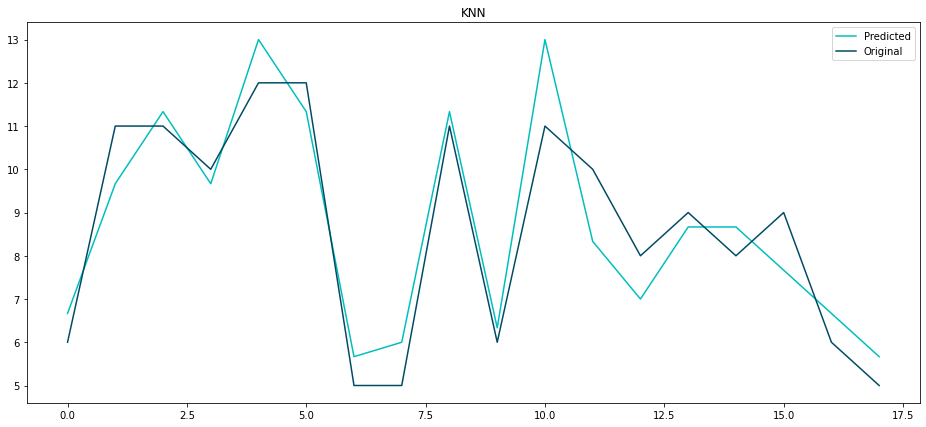

In [ ]:
resultKNN_df = pd.DataFrame(columns=['Predicted'])
resultKNN_df['Predicted'] = y_pred
resultKNN_df['Original'] = y_test
#resultLR_df['Angle'] = dataset[''].values
#resultLR_df.set_index(['Angle'], inplace = True)
resultKNN_df.plot(figsize=(16,7), kind = 'line',title = 'KNN')

<AxesSubplot:title={'center':'XGB'}>

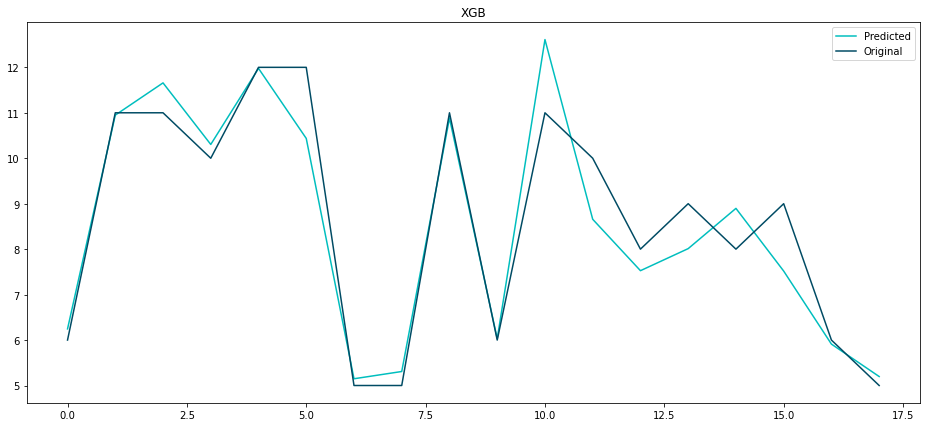

In [ ]:
resultXGB_df = pd.DataFrame(columns=['Predicted'])
resultXGB_df['Predicted'] = y_pred2
resultXGB_df['Original'] = y_test
#resultLR_df['Angle'] = dataset[''].values
#resultLR_df.set_index(['Angle'], inplace = True)
resultXGB_df.plot(figsize=(16,7), kind = 'line',title = 'XGB')

<AxesSubplot:title={'center':'pl'}>

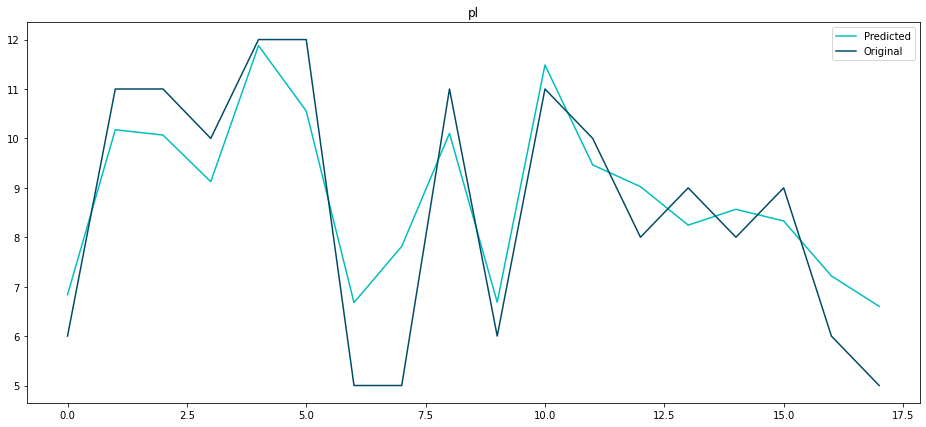

In [ ]:
resultpl_df = pd.DataFrame(columns=['Predicted'])
resultpl_df['Predicted'] = y_pred3
resultpl_df['Original'] = y_test
#resultLR_df['Angle'] = dataset[''].values
#resultLR_df.set_index(['Angle'], inplace = True)
resultpl_df.plot(figsize=(16,7), kind = 'line',title = 'pl')

<AxesSubplot:title={'center':'KNN'}>

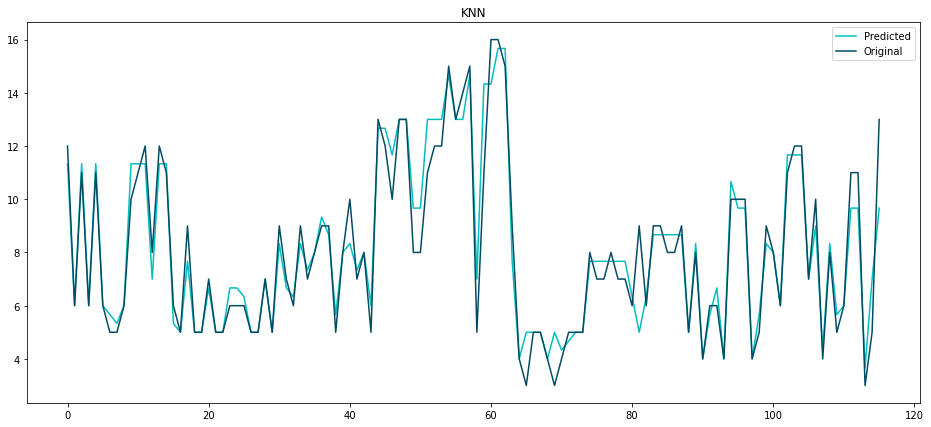

In [ ]:
y_pred = knn.predict(x)
resultLR_dfall = pd.DataFrame(columns=['Predicted'])
resultLR_dfall['Predicted'] = y_pred
resultLR_dfall['Original'] = y
resultLR_dfall.plot(figsize=(16,7), kind = 'line',title = 'KNN')

<AxesSubplot:title={'center':'XGB'}>

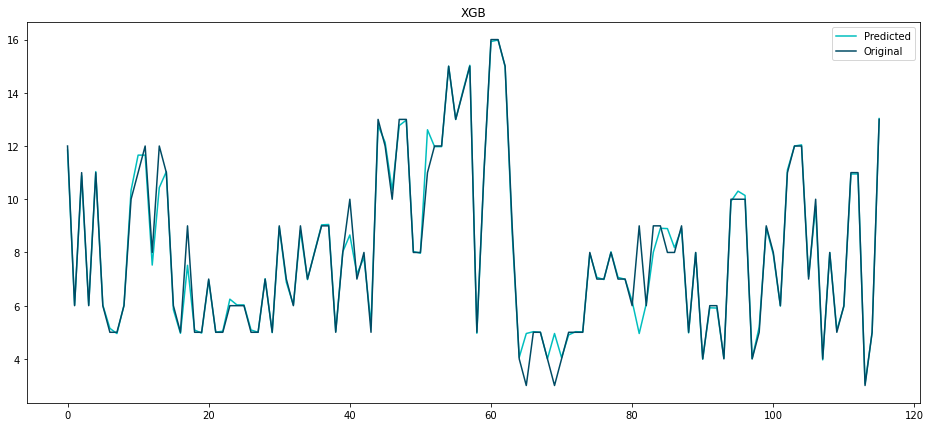

In [ ]:
y_pred2 = XGBmodel.predict(x)
resultXGB_dfall = pd.DataFrame(columns=['Predicted'])
resultXGB_dfall['Predicted'] = y_pred2
resultXGB_dfall['Original'] = y
resultXGB_dfall.plot(figsize=(16,7), kind = 'line',title = 'XGB')

<AxesSubplot:title={'center':'PL'}>

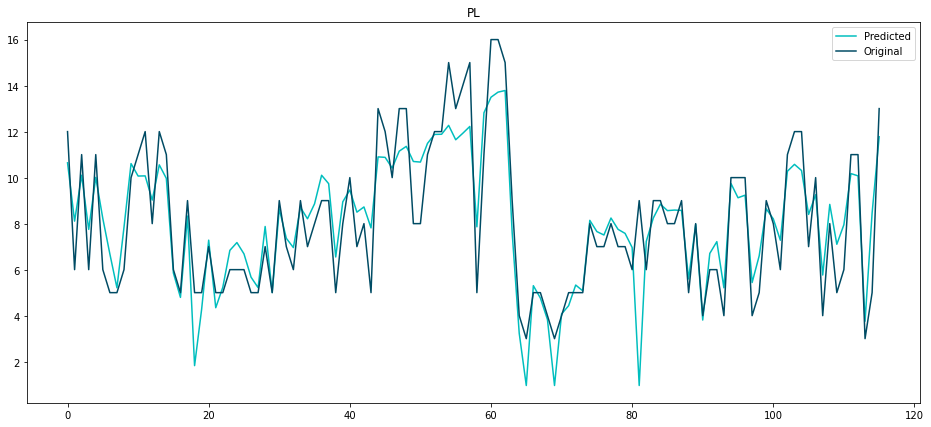

In [ ]:
y_pred3 = reg.predict(plr.fit_transform(x))
resultpl_dfall = pd.DataFrame(columns=['Predicted'])
resultpl_dfall['Predicted'] = y_pred3
resultpl_dfall['Original'] = y
resultpl_dfall.plot(figsize=(16,7), kind = 'line',title = 'PL')

<AxesSubplot:>

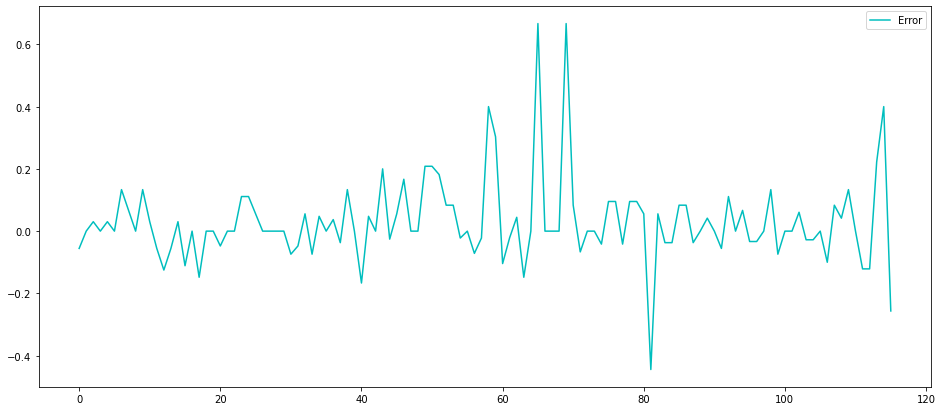

In [ ]:
Error = pd.DataFrame((-resultLR_dfall['Original'].values+ resultLR_dfall['Predicted'].values)/resultLR_dfall['Original'].values, columns = ['Error'])
Error.plot(figsize = (16,7))


In [ ]:
Error.abs().mean()

Error    0.080402
dtype: float64

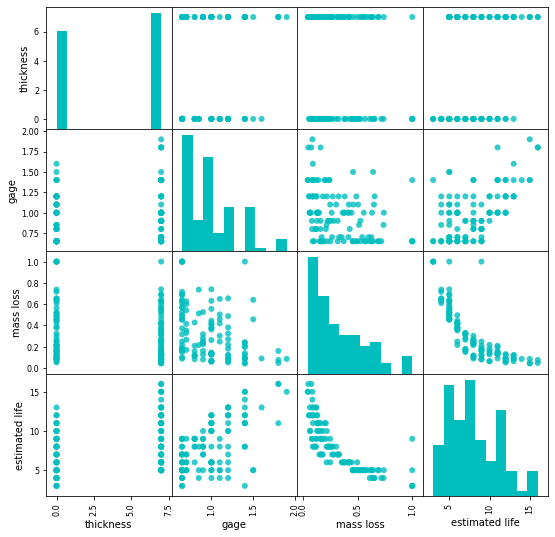

In [ ]:
dataclear = pd.concat([pd.DataFrame(x),pd.DataFrame(y)], axis =1)
dataclear.columns = ['thickness', 'gage', 'mass loss', 'estimated life']
dataclear = dataclear.T


corel = pd.DataFrame(np.corrcoef(dataclear), columns = ['thickness', 'gage', 'mass loss', 'estimated life'])
fig = pd.plotting.scatter_matrix(dataclear.T,figsize=(9,9),c = '#00BEBE',marker = 'o',diagonal='hist',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'

plt.show()

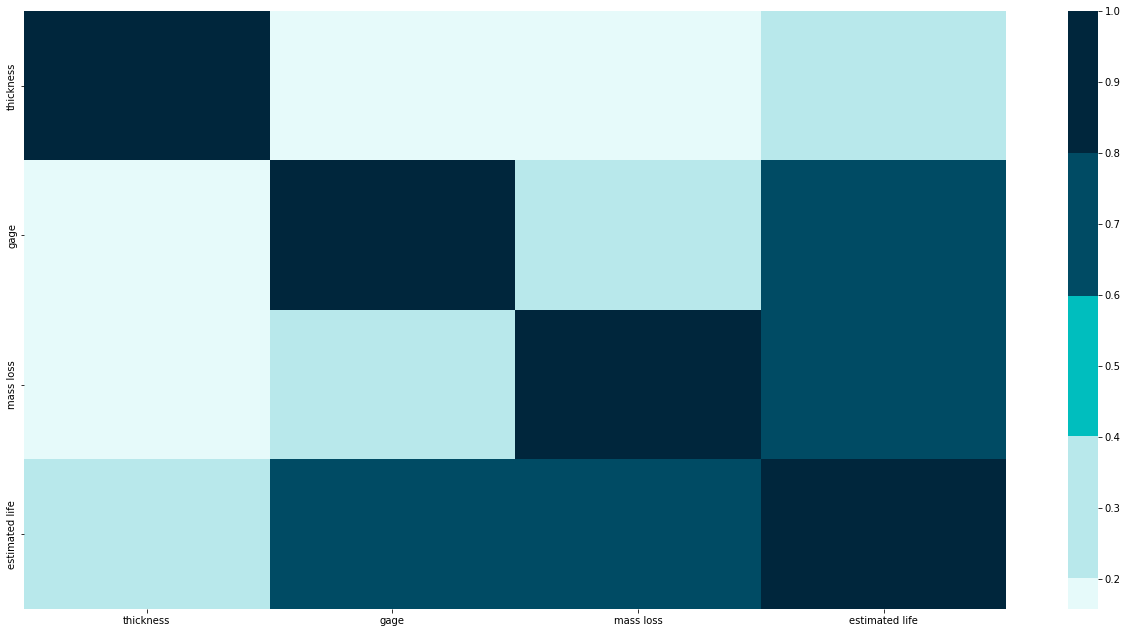

In [ ]:
plt.figure(figsize=(22, 11)) # page size
#sns.set(font_scale=2)
sns.heatmap(abs(dataclear.T.corr()),center = 0, annot =False, cmap = ['#004B64', '#00BEBE','#B8E8EB', '#E6FAFA','#F7F9FA','#E6FAFA','#B8E8EB','#00BEBE','#004B64' ,'#00263C' ])


plt.show()

In [ ]:
np.corrcoef(dataclear)

array([[ 1.        ,  0.16136135, -0.15818083,  0.28924243],
       [ 0.16136135,  1.        , -0.35200223,  0.60151499],
       [-0.15818083, -0.35200223,  1.        , -0.79472043],
       [ 0.28924243,  0.60151499, -0.79472043,  1.        ]])

In [ ]:
Singletest = dataset.head(15)
Singletest.sort_values(by = ['Mass Loss'], inplace = True)
Singletest.reset_index(drop = True, inplace = True)

In [ ]:
y = Singletest['Panel Life Estimate']
Singletest = Singletest.drop(['Panel Life Estimate'],axis = 1)

In [ ]:
dataset.head(15)['Panel Life Estimate'].values

array([12, 6, 11, 6, 11, 6, 5, 5, 6, 10, 11, 12, 8, 12, 11], dtype=object)

In [ ]:
Singletest

,Thickness,Gage (mm),Mass Loss
0,7,1.0,0.0588
1,7,1.0,0.0631
2,7,1.0,0.0700
3,7,1.0,0.1265
4,7,1.0,0.1300
5,7,1.0,0.1309
6,7,1.0,0.1381
7,7,1.0,0.1437
8,7,1.0,0.2617
9,7,1.0,0.3623


<AxesSubplot:title={'center':'KNN'}, xlabel='Mass loss'>

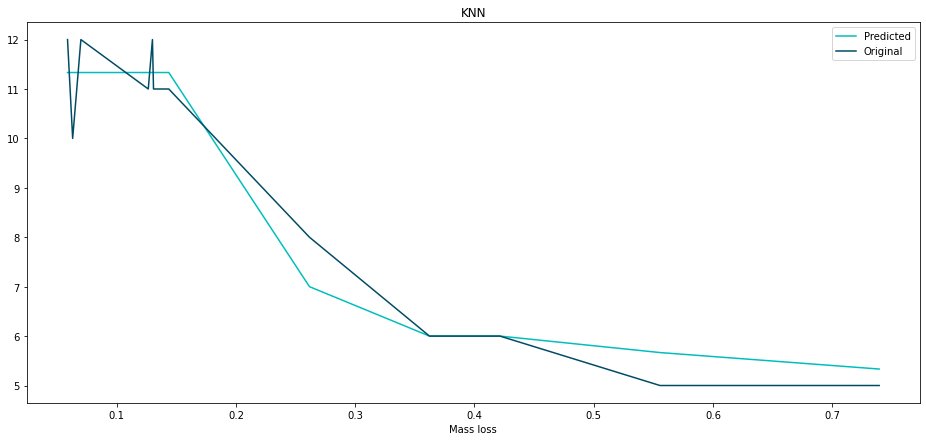

In [ ]:
y_pred = knn.predict(Singletest.values)
resultLR_dfall = pd.DataFrame(columns=['Predicted'])
resultLR_dfall['Predicted'] = y_pred
resultLR_dfall['Original'] = y
resultLR_dfall['Mass loss'] = Singletest['Mass Loss']
resultLR_dfall.set_index(['Mass loss'], inplace = True)
resultLR_dfall.plot(figsize=(16,7) ,kind = 'line',title = 'KNN')

<AxesSubplot:title={'center':'XGBoost'}, xlabel='Mass loss'>

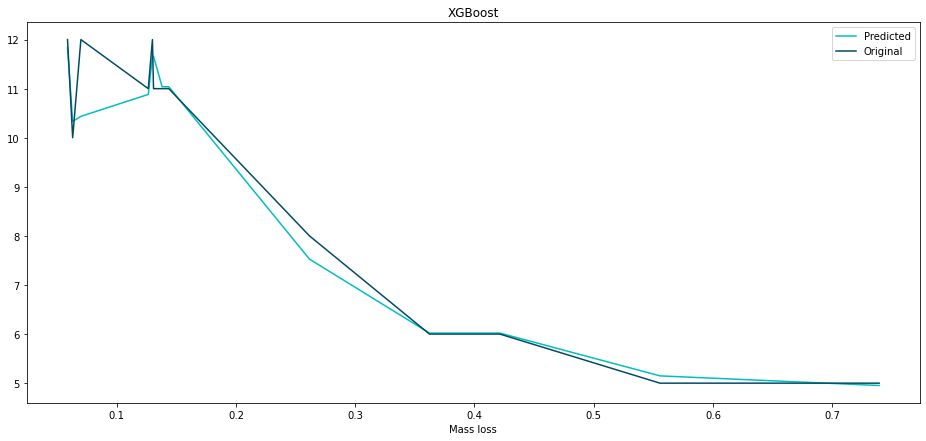

In [ ]:
y_pred2 = XGBmodel.predict(Singletest.values)
XG = pd.DataFrame(columns=['Predicted'])
XG['Predicted'] = y_pred2
XG['Original'] = y
XG['Mass loss'] = Singletest['Mass Loss']
XG.set_index(['Mass loss'], inplace = True)
XG.plot(figsize=(16,7) ,kind = 'line',title = 'XGBoost')

In [ ]:
dataclear = dataclear.T.sort_values('estimated life').reset_index()
dataclear

,index,thickness,gage,mass loss,estimated life
0,113,0.0,1.40,1.0000,3.0
1,69,0.0,0.65,1.0000,3.0
2,65,0.0,0.65,1.0000,3.0
3,97,0.0,1.10,0.6493,4.0
4,90,0.0,0.85,0.7368,4.0
...,...,...,...,...,...
111,54,7.0,1.40,0.0415,15.0
112,62,7.0,1.90,0.0851,15.0
113,57,7.0,1.40,0.0475,15.0
114,61,7.0,1.80,0.0473,16.0


In [ ]:
dataclear = dataclear.sort_values('estimated life').reset_index()
dataclear

,level_0,index,thickness,gage,mass loss,estimated life
0,0,113,0.0,1.40,1.0000,3.0
1,1,69,0.0,0.65,1.0000,3.0
2,2,65,0.0,0.65,1.0000,3.0
3,8,68,0.0,0.65,0.6410,4.0
4,7,64,0.0,0.65,0.7160,4.0
...,...,...,...,...,...,...
111,111,54,7.0,1.40,0.0415,15.0
112,112,62,7.0,1.90,0.0851,15.0
113,113,57,7.0,1.40,0.0475,15.0
114,114,61,7.0,1.80,0.0473,16.0


In [ ]:
def colormap(x):
    if x <= 5:
        colormap ='#B8E8EB'
    elif x <= 8:
        colormap = '#00BEBE'
    elif x < 12:
        colormap ='#004B64'
    else:
        colormap =  '#00263C'
    return colormap

dataclear['color'] = dataclear['estimated life'].map(colormap)

dataclear

,level_0,index,thickness,gage,mass loss,estimated life,color
0,0,113,0.0,1.40,1.0000,3.0,#B8E8EB
1,1,69,0.0,0.65,1.0000,3.0,#B8E8EB
2,2,65,0.0,0.65,1.0000,3.0,#B8E8EB
3,8,68,0.0,0.65,0.6410,4.0,#B8E8EB
4,7,64,0.0,0.65,0.7160,4.0,#B8E8EB
...,...,...,...,...,...,...,...
111,111,54,7.0,1.40,0.0415,15.0,#00263C
112,112,62,7.0,1.90,0.0851,15.0,#00263C
113,113,57,7.0,1.40,0.0475,15.0,#00263C
114,114,61,7.0,1.80,0.0473,16.0,#00263C


<function matplotlib.pyplot.show(close=None, block=None)>

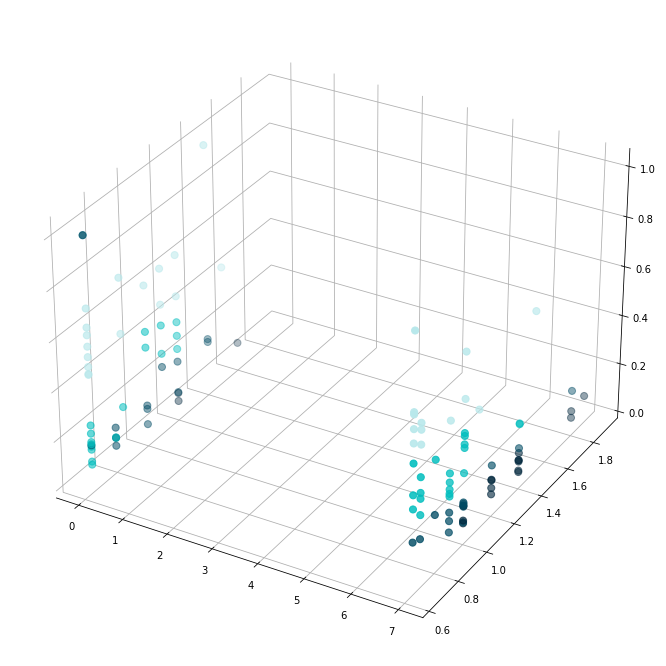

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection = '3d')

ax.w_xaxis.set_pane_color((0, 0, 0, 0))
ax.w_yaxis.set_pane_color((0, 0, 0, 0))
ax.w_zaxis.set_pane_color((0, 0, 0, 0))

figure = ax.scatter(dataclear['thickness'],dataclear['gage'], dataclear['mass loss'], s = 50,c =dataclear['color'], marker = 'o')
ax.grid(True)
plt.show
#z方向为垂直于a面向内

<AxesSubplot:title={'center':'XGBoost and KNN'}>

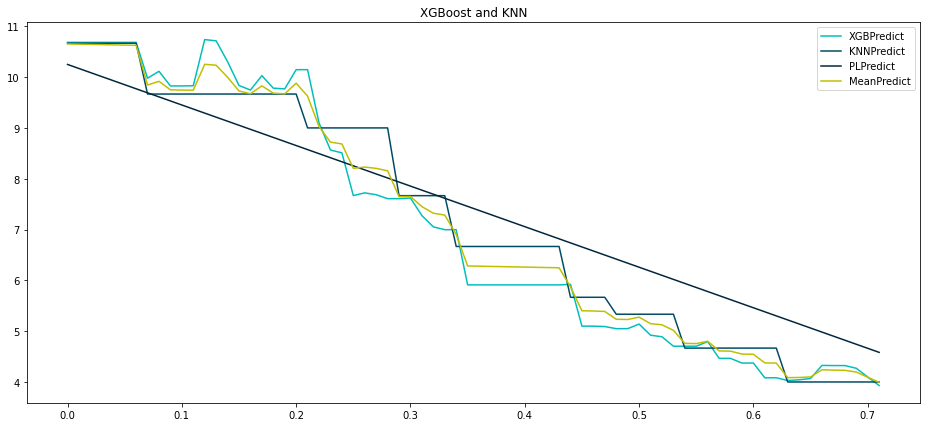

In [ ]:
reg_a = [i/100 for i in range(72)]
reg_df = pd.DataFrame(index = reg_a, columns = ['Thickness','Gage','Mass Loss'])
reg_df['Thickness'] = 0
reg_df['Gage'] = 1.0
reg_df['Mass Loss'] = reg_a
y_pred4 = XGBmodel.predict(reg_df.values)
y_pred5 = knn.predict(reg_df.values)
y_pred6 = reg.predict(plr.fit_transform(reg_df.values))
reg_df['XGBPredict'] = y_pred4
reg_df['KNNPredict'] = y_pred5
reg_df['PLPredict'] = y_pred6
reg_df['MeanPredict'] = (3*y_pred4 + 2*y_pred5 + 0.3*y_pred6)/5.3
reg_df[['XGBPredict','KNNPredict','PLPredict','MeanPredict']].plot(figsize=(16,7) ,kind = 'line',title = 'XGBoost and KNN', color = ['#00BEBE','#004B64', '#00263C', 'y',  '#DCDCDE',
'#FFF794',  '#FF231E'])

In [ ]:
reg_df

,Thickness,Gage,Mass Loss,XGBPredict,KNNPredict,PLPredict,MeanPredict
0.00,0,1.0,0.00,10.683770,10.666667,10.249234,10.652720
0.01,0,1.0,0.01,10.683770,10.666667,10.169418,10.648202
0.02,0,1.0,0.02,10.683770,10.666667,10.089602,10.643684
0.03,0,1.0,0.03,10.683770,10.666667,10.009786,10.639166
0.04,0,1.0,0.04,10.683770,10.666667,9.929970,10.634648
...,...,...,...,...,...,...,...
0.67,0,1.0,0.67,4.322775,4.000000,4.901560,4.233734
0.68,0,1.0,0.68,4.322775,4.000000,4.821744,4.229217
0.69,0,1.0,0.69,4.269938,4.000000,4.741928,4.194791
0.70,0,1.0,0.70,4.096730,4.000000,4.662111,4.092231


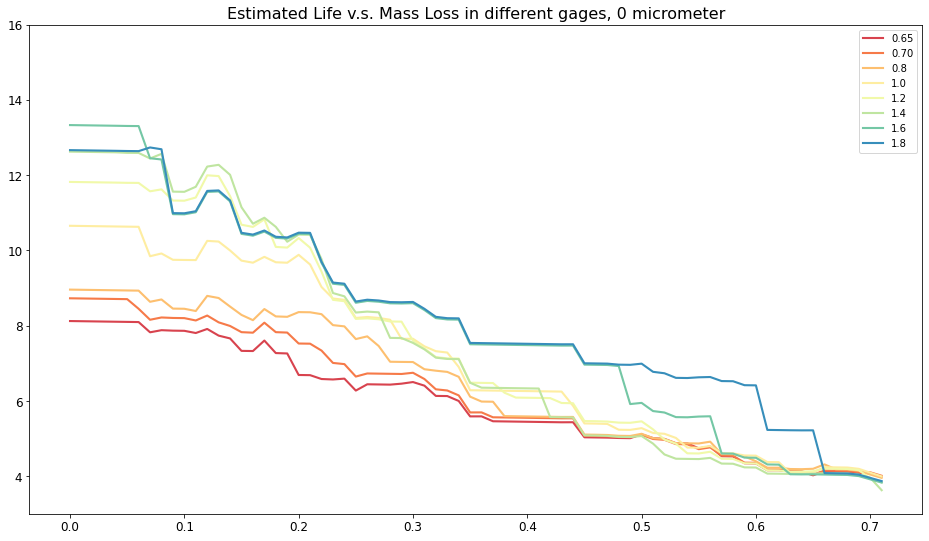

In [ ]:
reg_a = [i/100 for i in range(72)]
re = pd.DataFrame(index = reg_a, columns = ['0.65','0.70','0.8','1.0','1.2','1.4','1.6','1.8'])
thickness = [0.65 , 0.7, 0.8, 1.0 , 1.2, 1.4, 1.6, 1.8]
for i in range(8):
    reg_df = pd.DataFrame(index = reg_a, columns = ['Thickness','Gage','Mass Loss'])
    reg_df['Thickness'] = 0
    reg_df['Gage'] = thickness[i]
    reg_df['Mass Loss'] = reg_a
    y_pred4 = XGBmodel.predict(reg_df.values)
    y_pred5 = knn.predict(reg_df.values)
    y_pred6 = reg.predict(plr.fit_transform(reg_df.values))


    re['XGBPredict'] = y_pred4
    re['KNNPredict'] = y_pred5
    re['PLPredict'] = y_pred6
    re.iloc[:,i] = (3*y_pred4 + 2*y_pred5 + 0.3*y_pred6)/5.3
fig = re.drop(columns = ['XGBPredict','KNNPredict','PLPredict']).plot(figsize=(16,9) ,fontsize = 12,ylim = [3, 16],linewidth = 2.1, kind = 'line',title = 'Estimated Life v.s. Mass Loss in different gages, 0 micrometer', color = cc(range(8)) )

fig.axes.title.set_size(16)

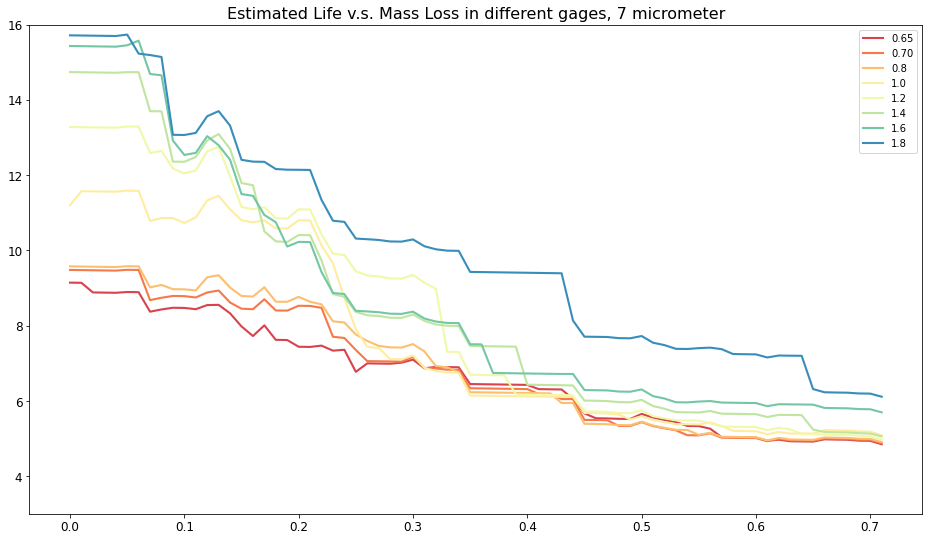

In [ ]:
reg_a = [i/100 for i in range(72)]
re = pd.DataFrame(index = reg_a, columns = ['0.65','0.70','0.8','1.0','1.2','1.4','1.6','1.8'])
thickness = [0.65 , 0.7, 0.8, 1.0 , 1.2, 1.4, 1.6, 1.8]
for i in range(8):
    reg_df = pd.DataFrame(index = reg_a, columns = ['Thickness','Gage','Mass Loss'])
    reg_df['Thickness'] = 7
    reg_df['Gage'] = thickness[i]
    reg_df['Mass Loss'] = reg_a
    y_pred4 = XGBmodel.predict(reg_df.values)
    y_pred5 = knn.predict(reg_df.values)
    y_pred6 = reg.predict(plr.fit_transform(reg_df.values))


    re['XGBPredict'] = y_pred4
    re['KNNPredict'] = y_pred5
    re['PLPredict'] = y_pred6
    re.iloc[:,i] = (3*y_pred4 + 2*y_pred5 + 0.3*y_pred6)/5.3
fig = re.drop(columns = ['XGBPredict','KNNPredict','PLPredict']).plot(figsize=(16,9) ,fontsize = 12,ylim = [3, 16],linewidth = 2.1, kind = 'line',title = 'Estimated Life v.s. Mass Loss in different gages, 7 micrometer', color = cc(range(8)) )

fig.axes.title.set_size(16)
